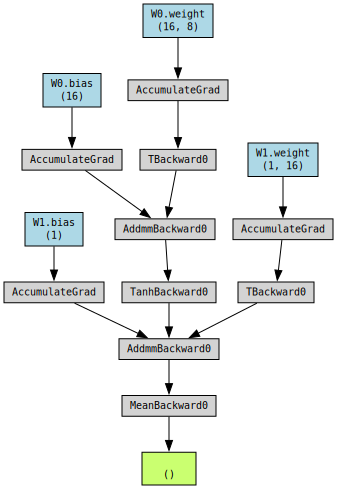

In [1]:
from torchviz import make_dot
import torch
from torch import nn

model = nn.Sequential()
model.add_module("W0", nn.Linear(8, 16))
model.add_module("tanh", nn.Tanh())
model.add_module("W1", nn.Linear(16, 1))

x = torch.randn(1, 8)
y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()))

torch.Size([10, 1])


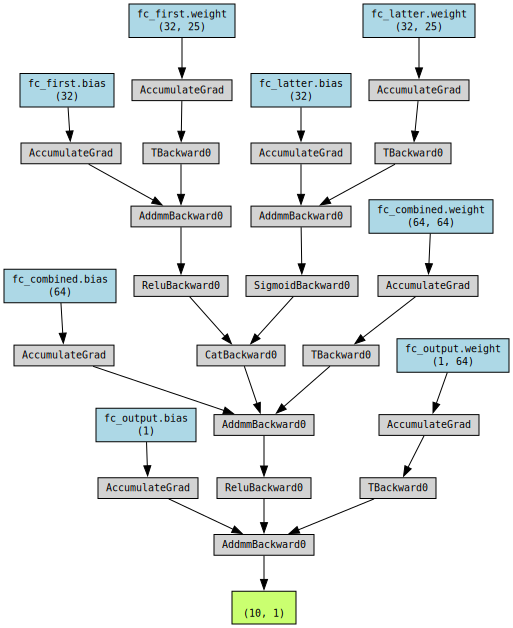

In [2]:
import torch
import torch.nn as nn

class CustomActivationModel(nn.Module):
    def __init__(self, input_dim=50, hidden_dim=64, output_dim=1):
        super(CustomActivationModel, self).__init__()
        # Linear layers for splitting
        self.fc_first = nn.Linear(25, 32)
        self.fc_latter = nn.Linear(25, 32)
        # Activation functions
        self.act_first = nn.ReLU()
        self.act_latter = nn.Sigmoid()
        # Combine and further processing
        self.fc_combined = nn.Linear(64, hidden_dim)
        self.act_combined = nn.ReLU()
        self.fc_output = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Split input: x[:, :25] and x[:, 25:]
        x_first = self.act_first(self.fc_first(x[:, :25]))
        x_latter = self.act_latter(self.fc_latter(x[:, 25:]))
        # Concatenate
        x_combined = torch.cat([x_first, x_latter], dim=1)
        x = self.act_combined(self.fc_combined(x_combined))
        out = self.fc_output(x)
        return out

# Example usage
model = CustomActivationModel()
sample_input = torch.randn(10, 50)  # Batch size of 10
output = model(sample_input)
print(output.shape)  # Should be [10, 1]
make_dot(output, params=dict(model.named_parameters()))